In [1]:
# Spam Prediction using NLP

In [2]:
# First we have to import some basic libreries which we always need

In [3]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Now we will Import our given Dataset
dataset = pd.read_csv("D:AI_ML/Theory/ML/spam.csv", encoding='latin_1')   # I have spam.csv file as a given file 

In [5]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Find shape of dataset
dataset.shape

(5572, 5)

In [7]:
# Find NaN if present in our dataset
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
# So, here we see that except 1st and 2nd column remaining columns have almost all the values as NaN,
# So we can drop these columns
dataset = dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# So now we have a correct dataset for further work

In [10]:
# We can also change column names for better understanding
dataset = dataset.rename(columns = {'v1':'label','v2':'text'})

In [11]:
dataset.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#Count observations in each label
dataset.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [13]:
# convert label to a numerical variable
dataset['label_num'] = dataset.label.map({'ham':1, 'spam':0})

In [14]:
dataset.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [15]:
# We are cheching total no of words in each row
dataset['length'] = dataset['text'].apply(len)
dataset.head()

,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61


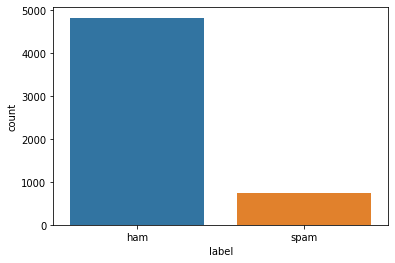

In [16]:
import seaborn as sns
sns.countplot(dataset["label"])
plt.show()

In [17]:
# Cleaning the texts
# Import required liabraries to clean data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer        #Stemming

[nltk_data] Downloading package stopwords to C:\Users\Triple
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
corpus = []
for i in range(0, 5572):
    textt = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    textt = textt.lower()
    textt = textt.split()
    ps = PorterStemmer()
    textt = [ps.stem(word) for word in textt if not word in set(stopwords.words('english'))]
    textt = ' '.join(textt)
    corpus.append(textt)

In [19]:
corpus[1:10]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [20]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 2].values

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
X_train[0:5],y_train[0:5]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([1, 1, 0, 0, 0], dtype=int64))

In [23]:
# Fitting Naive Bayes to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000)     #n_estimator means no of trees
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 172,   25],
       [   1, 1195]], dtype=int64)

In [26]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP,TN,FP,FN

(1195, 172, 25, 1)

In [27]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy

0.9813352476669059

In [28]:
Precision = TP / (TP + FP)
Precision

0.9795081967213115

In [29]:
Recall = TP / (TP + FN)
Recall

0.9991638795986622

In [30]:
F1_Score = 2 * Precision * Recall / (Precision + Recall)
F1_Score

0.9892384105960265

In [31]:
# I have used here Random_Forest_Classifier. You can also use other classifiers like Naive_Bayes, Decision Tree etc.. 
# Check the result from every model and choose best one.    """ THANKS! """